In [81]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [82]:
train=pd.read_csv('C:/Users/NanduCn/jupter1/train_loan.csv')
test=pd.read_csv('C:/Users/NanduCn/jupter1/test_loan.csv')

In [83]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [84]:
a1=test['Loan_ID']

In [85]:
train.shape,test.shape

((614, 13), (367, 12))

In [86]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


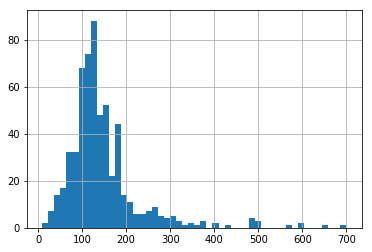

In [87]:
train.LoanAmount.hist(bins=50)

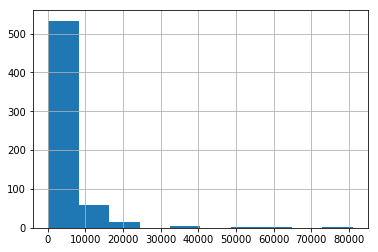

In [88]:
train.ApplicantIncome.hist()

In [89]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
Y=train['Loan_Status'].map({'Y':1,'N':0})


In [91]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

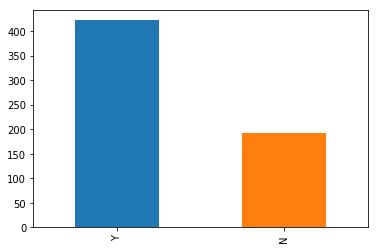

In [92]:
train['Loan_Status'].value_counts().plot.bar()

In [93]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [94]:
train['Gender'].fillna(train['Gender'].mode(), inplace=True)

In [95]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [96]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [98]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [101]:
mylist=list(train.select_dtypes(include=['object']).columns)
mylist.remove('Loan_ID')

mylist1=list(test.select_dtypes(include=['object']).columns)
mylist1.remove('Loan_ID')

In [102]:
mylist.remove('Loan_Status')


In [103]:
mylist, mylist1

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'])

In [104]:
dummies=pd.get_dummies(train[mylist], prefix=mylist)
train.drop(mylist, axis=1, inplace=True)
train=pd.concat([train,dummies], axis=1)

dummies1=pd.get_dummies(test[mylist1], prefix=mylist1)
test.drop(mylist1, axis=1, inplace=True)
test=pd.concat([test,dummies1], axis=1)

In [105]:
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [106]:
a=test['Loan_ID']
X=train.drop(['Loan_ID'], axis=1)
test=test.drop(['Loan_ID'], axis=1)
X=X.drop(['Loan_Status'], axis=1)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30)

In [126]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
pred_cv = model.predict(x_test)

In [129]:
accuracy_score(y_test,pred_cv)

0.8324324324324325

In [130]:
pred_test = model.predict(test)

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_cv )

array([[ 28,  28],
       [  3, 126]], dtype=int64)

In [131]:
submission=pd.DataFrame({"Loan_ID":a,"Loan_Status":pred_test})


In [132]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [133]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [134]:
submission.to_csv("logstic.csv")

In [135]:
create_download_link('logstic.csv')

NameError: name 'create_download_link' is not defined

In [137]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link(submission , title = "Download CSV file", filename = "logstic.csv"):  
    csv = submission.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)